The goal of PCA is to determine the axis where the data varies the most (using eigen values of the computed eigen vectors). Then, we reproject our data to these new axes using the computed eigen vectors. The components with the largest eigen values explain the most variance in the data. Thus, we can select a subset of eigen vectors to transform our data with and still capture most of the variance within the data. 

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.decomposition import PCA

In [948]:
X_1 = 2 + np.random.rand(100,1)
X_2 = np.random.rand(100,1)**2
X_3 = 20 + np.random.rand(100,1)
X_4 = np.random.rand(100,1)**3
X_5 = 5 + np.random.rand(100,1)
X_6 = 6 + np.random.rand(100,1)
X_7 = 4 * np.random.rand(100,1)
X_8 = 8 - np.random.rand(100,1)
X_9 = 3 / np.random.rand(100,1)
X_10 = 7 / np.random.rand(100,1)

y = X_4/3

In [949]:
X = np.c_[X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10]

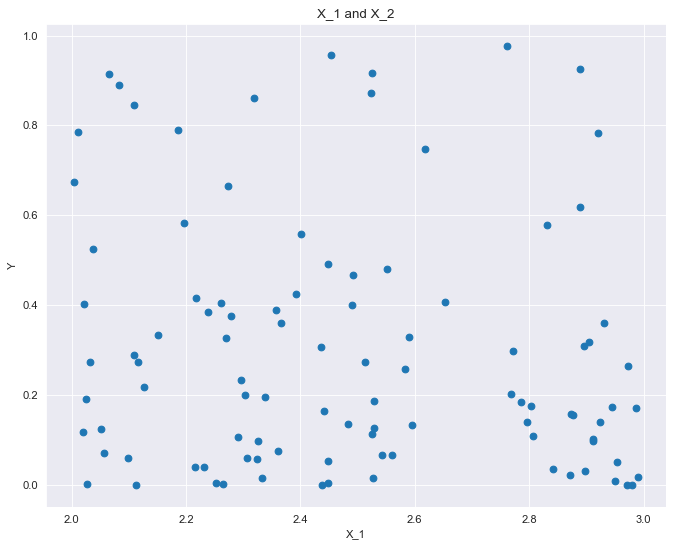

In [950]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('X_1 and X_2')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.scatter(X[:,0], X[:,1])
plt.show()

### Step 1: Subtract Mean

In [951]:
mean = np.mean(X, axis= 0)

In [952]:
X_centered = X - mean
X_centered.shape

(100, 10)

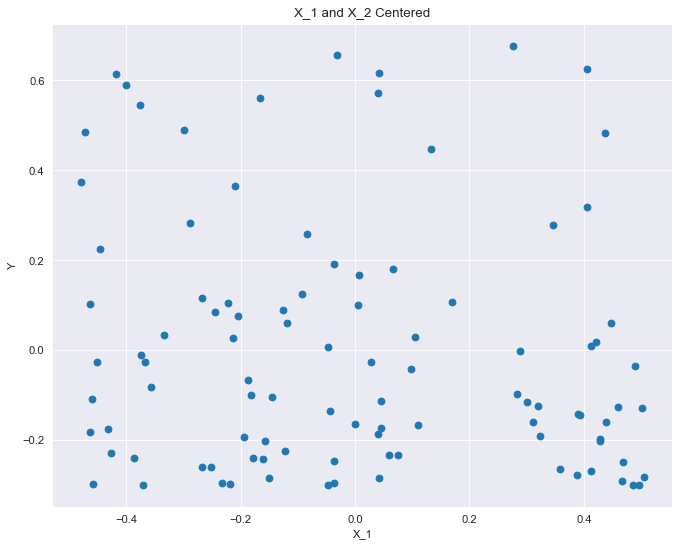

In [953]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('X_1 and X_2 Centered')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.scatter(X_centered[:,0], X_centered[:,1])
plt.show()

### Calculate Covariance Matrix

In [954]:
X_centered.T.shape

(10, 100)

In [955]:
covarience_matrix = np.cov(X_centered, rowvar = False)

In [956]:
#get variance of X_1 to compare to first diagonal of cov matrix
X_centered[:,0].var(ddof=1)

0.09616414129318532

In [957]:
covarience_matrix[:,0]

array([ 9.61641413e-02, -1.31684933e-02,  2.00082959e-03, -4.93185421e-03,
        2.00068620e-02,  4.91912784e-03,  2.13557810e-02,  6.15107094e-03,
        2.83809454e+00, -2.39879545e+00])

In [958]:
covarience_matrix.shape

(10, 10)

### Compute Eigen Vectors and Eigen Values of Covarience Matrix

In [959]:
eig_value, eig_vector = np.linalg.eig(covarience_matrix.T)

In [960]:
eig_vector.shape

(10, 10)

In [961]:
eig_value.shape

(10,)

In [962]:
eig_value

array([4.97431555e+03, 1.39458790e+03, 1.20729902e+00, 1.25060247e-01,
       4.67667900e-02, 5.61613175e-02, 7.11497821e-02, 8.18261156e-02,
       9.80566226e-02, 9.32263317e-02])

In [963]:
eig_value_sorted

array([7.11686215e+04, 6.06969713e+04, 1.28280200e+00, 1.10952100e-01,
       9.47306404e-02, 8.54614876e-02, 7.93930718e-02, 6.87497454e-02,
       6.37346644e-02, 4.88405450e-02])

### Short Eigen Vectors by Eigen Value

In [964]:
idx = eig_value.argsort()
#sort descending orer
eig_value_sorted = eig_value[idx[::-1]]
eig_vector_sorted = eig_vector[idx[::-1]]

In [965]:
[-2.36817330e-06, -2.32407134e-04,  4.29444780e-02,
         3.23126890e-01, -3.23080437e-01,  7.63994478e-01,
         1.79263084e-01, -2.76635056e-01,  3.11095580e-01,
         1.52817644e-02]

[-2.3681733e-06,
 -0.000232407134,
 0.042944478,
 0.32312689,
 -0.323080437,
 0.763994478,
 0.179263084,
 -0.276635056,
 0.31109558,
 0.0152817644]

### Compute Explained Variance

In [966]:
explained_var = eig_value_sorted/sum(eig_value_sorted)
component = ["comp1", "comp2", "comp3", "comp4", "comp5","comp6", "comp7", "comp8", "comp9", "comp10"]
list(zip(component, list(explained_var)))

[('comp1', 0.7808135408018744),
 ('comp2', 0.2189071255341167),
 ('comp3', 0.00018950856897333727),
 ('comp4', 1.9630586963046472e-05),
 ('comp5', 1.5391853985853186e-05),
 ('comp6', 1.463364786105565e-05),
 ('comp7', 1.284416687051266e-05),
 ('comp8', 1.1168313040244558e-05),
 ('comp9', 8.815588141484016e-06),
 ('comp10', 7.340938173250884e-06)]

### Transform Data Using Eigen Vector

In [967]:
X_transformed = np.dot(X_centered, eig_vector)

In [968]:
X_transformed.shape

(100, 10)

In [969]:
X_transformed_shorted = X_transformed[:,idx[::-1]]

In [970]:
X_transformed_shorted.shape

(100, 10)

Let's plot the first two principal components, which should have the most explained variance.

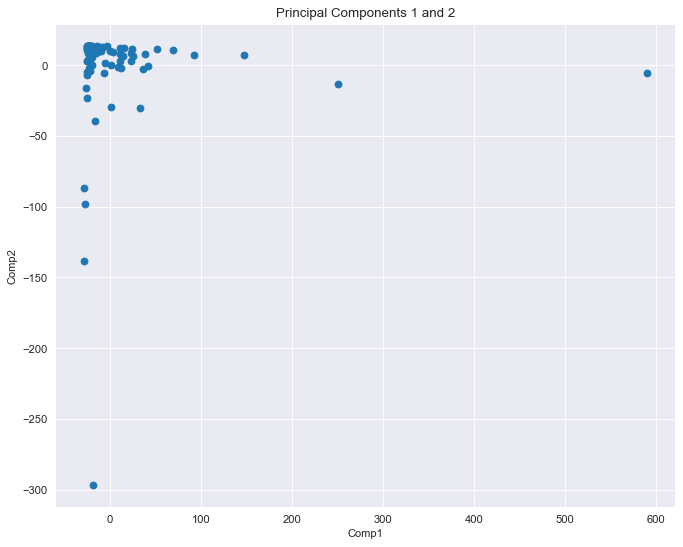

In [971]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 1 and 2')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_transformed_shorted[:,0], X_transformed_shorted[:,1])
plt.show()

Now, let's plot the 9th and 10th components, which should have the least variance. 

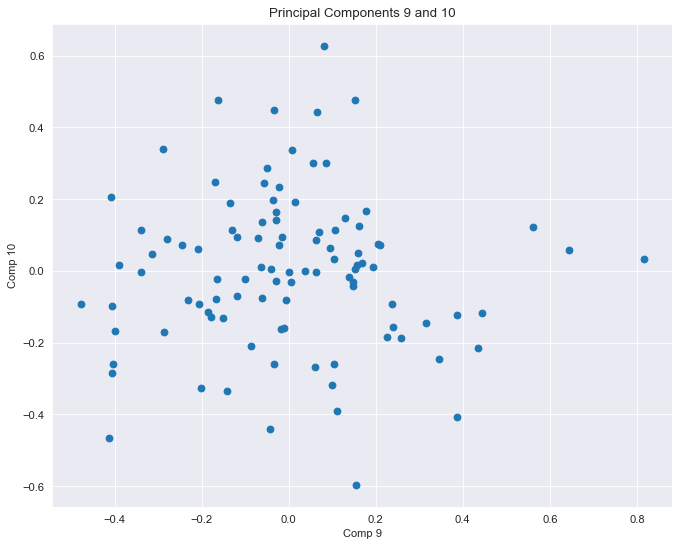

In [972]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 9 and 10')
plt.xlabel('Comp 9')
plt.ylabel('Comp 10')
plt.scatter(X_transformed_shorted[:,8], X_transformed_shorted[:,9])
plt.show()

### Reconstruct Original Data

= PCA_scores.dot(Eigenvectors.T) + mean

In [973]:
X[:,0]

array([2.84231118, 2.83091132, 2.30662221, 2.89615181, 2.61777714,
       2.45293796, 2.52446805, 2.29049994, 2.9508552 , 2.12720168,
       2.52355637, 2.29685665, 2.02152894, 2.59500369, 2.27027927,
       2.91226759, 2.5123235 , 2.80371424, 2.5891975 , 2.0380008 ,
       2.44798566, 2.88905516, 2.91214799, 2.89743953, 2.26523558,
       2.95287901, 2.33296635, 2.49143056, 2.03250501, 2.33832882,
       2.48375249, 2.05680302, 2.21719516, 2.11657033, 2.30306408,
       2.08295126, 2.35755308, 2.36604043, 2.23865201, 2.26161227,
       2.7954908 , 2.97084519, 2.18572821, 2.87323485, 2.44110664,
       2.54330708, 2.8892865 , 2.09854269, 2.94401803, 2.10891439,
       2.36150774, 2.39211156, 2.52903991, 2.58262315, 2.27957624,
       2.06592024, 2.27390525, 2.32649219, 2.90454825, 2.92360406,
       2.65303246, 2.98960319, 2.87188809, 2.02047306, 2.92054152,
       2.77223736, 2.15046007, 2.11334224, 2.43719379, 2.52595022,
       2.32381464, 2.19626893, 2.97975964, 2.01174766, 2.05206

In [974]:
X_reconstruct = X_transformed.dot(eig_vector.T) + mean
X_reconstruct[:,0]

array([2.84231118, 2.83091132, 2.30662221, 2.89615181, 2.61777714,
       2.45293796, 2.52446805, 2.29049994, 2.9508552 , 2.12720168,
       2.52355637, 2.29685665, 2.02152894, 2.59500369, 2.27027927,
       2.91226759, 2.5123235 , 2.80371424, 2.5891975 , 2.0380008 ,
       2.44798566, 2.88905516, 2.91214799, 2.89743953, 2.26523558,
       2.95287901, 2.33296635, 2.49143056, 2.03250501, 2.33832882,
       2.48375249, 2.05680302, 2.21719516, 2.11657033, 2.30306408,
       2.08295126, 2.35755308, 2.36604043, 2.23865201, 2.26161227,
       2.7954908 , 2.97084519, 2.18572821, 2.87323485, 2.44110664,
       2.54330708, 2.8892865 , 2.09854269, 2.94401803, 2.10891439,
       2.36150774, 2.39211156, 2.52903991, 2.58262315, 2.27957624,
       2.06592024, 2.27390525, 2.32649219, 2.90454825, 2.92360406,
       2.65303246, 2.98960319, 2.87188809, 2.02047306, 2.92054152,
       2.77223736, 2.15046007, 2.11334224, 2.43719379, 2.52595022,
       2.32381464, 2.19626893, 2.97975964, 2.01174766, 2.05206

### Compare results to PCA via Sklearn

In [975]:
pca = PCA(n_components=10)

In [976]:
pca.fit(X)

PCA(n_components=10)

In [977]:
eig_vector_sorted.T[:,0]

array([-4.97146879e-04, -1.98910237e-03,  1.47242228e-02, -3.76098823e-01,
        3.45121929e-01,  3.62595816e-01, -1.02554530e-01, -2.19739456e-01,
       -7.38752312e-01, -5.64442888e-02])

In [978]:
pca.components_[:,0]

array([-4.97146879e-04,  1.98910237e-03, -1.47242228e-02,  3.76098823e-01,
       -7.38752312e-01, -5.64442888e-02, -2.19739456e-01, -1.02554530e-01,
        3.62595816e-01,  3.45121929e-01])

In [979]:
X_pca = pca.transform(X)
X_pca.shape

(100, 10)

In [980]:
#our explaiend variance
list(zip(component, list(explained_var)))

[('comp1', 0.7808135408018744),
 ('comp2', 0.2189071255341167),
 ('comp3', 0.00018950856897333727),
 ('comp4', 1.9630586963046472e-05),
 ('comp5', 1.5391853985853186e-05),
 ('comp6', 1.463364786105565e-05),
 ('comp7', 1.284416687051266e-05),
 ('comp8', 1.1168313040244558e-05),
 ('comp9', 8.815588141484016e-06),
 ('comp10', 7.340938173250884e-06)]

In [981]:
#function explained variance
pca.explained_variance_ratio_

array([7.80813541e-01, 2.18907126e-01, 1.89508569e-04, 1.96305870e-05,
       1.53918540e-05, 1.46336479e-05, 1.28441669e-05, 1.11683130e-05,
       8.81558814e-06, 7.34093817e-06])

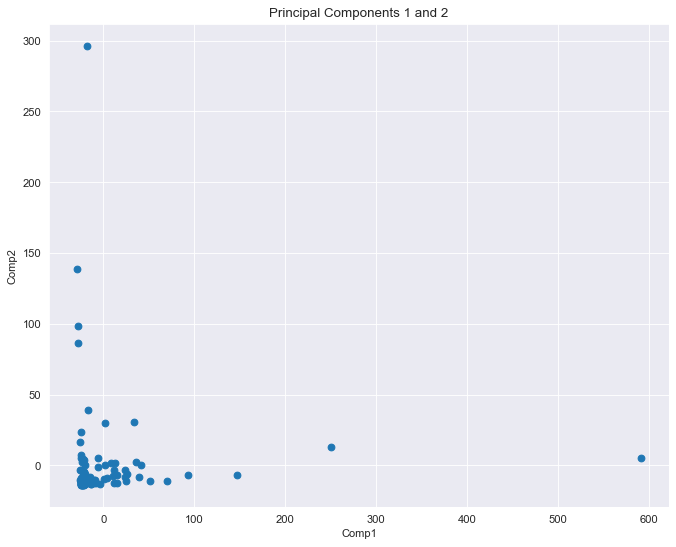

In [982]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 1 and 2')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

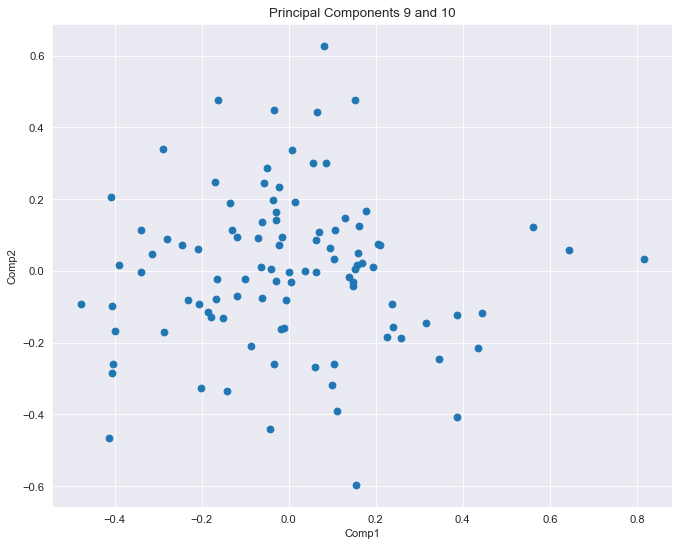

In [983]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 9 and 10')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_pca[:,8], X_pca[:,9])
plt.show()

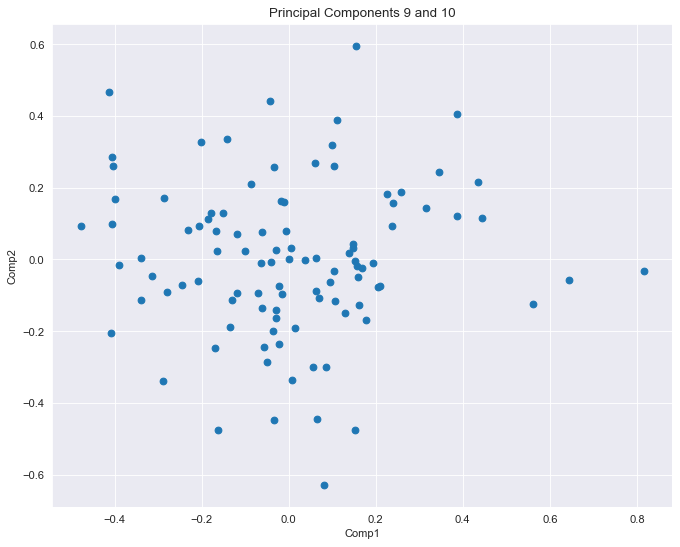

In [984]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 9 and 10')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_transformed_shorted[:,8], X_transformed_shorted[:,9]*-1)
plt.show()

In [985]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

lr = LinearRegression()

In [986]:
data_df = pd.DataFrame(X_transformed_shorted)
data_df['y'] = y

In [987]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,y
0,1.000000e+00,-5.876175e-16,-5.460112e-15,-7.343246e-15,4.687967e-15,-1.337524e-15,1.861407e-14,9.765962e-15,3.442306e-14,2.735865e-14,-0.017821
1,-5.876175e-16,1.000000e+00,-4.285394e-17,1.446129e-14,2.975167e-15,-3.314656e-15,-1.468774e-14,1.360306e-14,-1.690982e-14,-1.692394e-14,0.004467
2,-5.460112e-15,-4.285394e-17,1.000000e+00,-1.665267e-15,1.028321e-14,8.707752e-16,2.410166e-15,-2.894608e-15,-3.316192e-15,4.771446e-15,0.007311
3,-7.343246e-15,1.446129e-14,-1.665267e-15,1.000000e+00,1.033484e-12,4.379650e-13,7.147394e-13,-1.007560e-12,4.757771e-13,8.890737e-13,-0.032762
4,4.687967e-15,2.975167e-15,1.028321e-14,1.033484e-12,1.000000e+00,-2.510080e-12,-2.286347e-12,9.985584e-13,-4.538677e-13,5.451107e-13,0.109215
5,-1.337524e-15,-3.314656e-15,8.707752e-16,4.379650e-13,-2.510080e-12,1.000000e+00,-1.827363e-13,-2.341374e-13,-1.968690e-13,4.500028e-13,0.826162
6,1.861407e-14,-1.468774e-14,2.410166e-15,7.147394e-13,-2.286347e-12,-1.827363e-13,1.000000e+00,-1.784716e-12,-5.405398e-13,1.675873e-12,-0.063982
7,9.765962e-15,1.360306e-14,-2.894608e-15,-1.007560e-12,9.985584e-13,-2.341374e-13,-1.784716e-12,1.000000e+00,2.505513e-12,-1.988166e-12,0.491491
8,3.442306e-14,-1.690982e-14,-3.316192e-15,4.757771e-13,-4.538677e-13,-1.968690e-13,-5.405398e-13,2.505513e-12,1.000000e+00,5.914919e-12,0.207455
9,2.735865e-14,-1.692394e-14,4.771446e-15,8.890737e-13,5.451107e-13,4.500028e-13,1.675873e-12,-1.988166e-12,5.914919e-12,1.000000e+00,0.123972


In [996]:
lr.fit(X_transformed_shorted[:,0:6].reshape(100,6),  y)

LinearRegression()

In [997]:
pred_1 = lr.predict(X_transformed_shorted[:,0:6].reshape(100,6))

In [998]:
r2_score(y, pred_1)

0.6959366187694531